In [2]:
import polars as pl
import itables
import plotnine as p9

In [2]:
import polars as pl

In [5]:
x = pl.read_parquet("bootstrap_investigation.parquet")

In [16]:
itables.show(
    pl.read_parquet("bootstrap_investigation2.parquet").filter(
        pl.col("n_jobs").is_null(),
        pl.col("data_size").eq(500_000),
        # pl.col("bootstrap_iterations").eq(600),
        pl.col("function").eq("roc_auc2"),
    )
)

In [15]:
itables.show(
    pl.read_parquet("bootstrap_investigation3.parquet").filter(
        pl.col("n_jobs").is_null().or_(pl.col("n_jobs").eq(1)),
        pl.col("data_size").eq(500_000),
        pl.col("bootstrap_iterations").eq(600),
        # pl.col("function").eq("roc_auc2"),
    )
)

In [4]:
itables.show(x)

In [27]:
x

function,data_size,bootstrap_iterations,time,n_jobs
str,i64,i64,f64,i64
"""roc_auc""",100,100,0.237244,null
"""roc_auc2""",100,100,0.011175,null
"""roc_auc""",100,100,0.325379,1
"""roc_auc2""",100,100,0.012543,1
"""roc_auc""",100,100,0.271157,8
…,…,…,…,…
"""roc_auc2""",1100000,600,623.593736,1
"""roc_auc""",1100000,600,473.738301,8
"""roc_auc2""",1100000,600,425.54703,8


In [25]:
x

function,data_size,bootstrap_iterations,time,n_jobs
str,i64,i64,f64,i64
"""roc_auc""",100,100,0.614254,null
"""roc_auc2""",100,100,0.023147,null
"""roc_auc""",100,100,0.343311,1
"""roc_auc2""",100,100,0.021519,1
"""roc_auc""",100,100,0.307362,8
…,…,…,…,…
"""roc_auc2""",1000,600,0.049691,1
"""roc_auc""",1000,600,2.444129,8
"""roc_auc2""",1000,600,0.091001,8


In [23]:
itables.show(x)

In [20]:
x.filter(pl.col("data_size") >= 100_000)

function,data_size,bootstrap_iterations,time
str,i64,i64,f64
"""roc_auc""",100000,100,1.001105
"""roc_auc2""",100000,100,0.481684
"""roc_auc""",100000,200,1.887919
"""roc_auc2""",100000,200,0.955764
"""roc_auc""",100000,300,2.905149
…,…,…,…
"""roc_auc2""",1100000,400,213.130579
"""roc_auc""",1100000,500,248.743075
"""roc_auc2""",1100000,500,286.04108


In [11]:
BENCHMARK_DATA = pl.read_parquet("benchmark_data.parquet").with_columns(
    pl.col("Time").log1p().alias("Log(Time)")
)

In [12]:
BENCHMARK_DATA

Function,Size,Time,Log(Time)
str,i64,f64,f64
"""roc_auc""",100,11.16824,2.498829
"""roc_auc2""",100,0.726705,0.546215
"""roc_auc""",1000,15.827959,2.823042
"""roc_auc2""",1000,0.788131,0.581171
"""roc_auc""",10000,20.552131,3.070475
…,…,…,…
"""roc_auc2""",100000,20.52741,3.069327
"""roc_auc""",500000,159.274196,5.076886
"""roc_auc2""",500000,93.058408,4.543916


In [10]:
BENCHMARK_DATA

Function,Size,Time,Log(Time)
str,i64,f64,f64
"""roc_auc""",100,2.823334,1.341123
"""roc_auc2""",100,0.17777,0.163623
"""roc_auc""",1000,4.240939,1.656501
"""roc_auc2""",1000,0.18184,0.167073
"""roc_auc""",10000,4.786066,1.755453
…,…,…,…
"""roc_auc2""",100000,4.803309,1.758428
"""roc_auc""",500000,36.966799,3.636712
"""roc_auc2""",500000,16.553312,2.865243


In [8]:
BENCHMARK_DATA

Function,Size,Time,Log(Time)
str,i64,f64,f64
"""roc_auc""",100,11.560641,2.530568
"""roc_auc2""",100,0.711497,0.537368
"""roc_auc""",1000,18.727304,2.982004
"""roc_auc2""",1000,0.80754,0.591967
"""roc_auc""",10000,22.042238,3.137329
"""roc_auc2""",10000,3.94261,1.597893
"""roc_auc""",100000,54.044016,4.008133
"""roc_auc2""",100000,24.909673,3.254616
"""roc_auc""",1000000,775.054631,6.654223


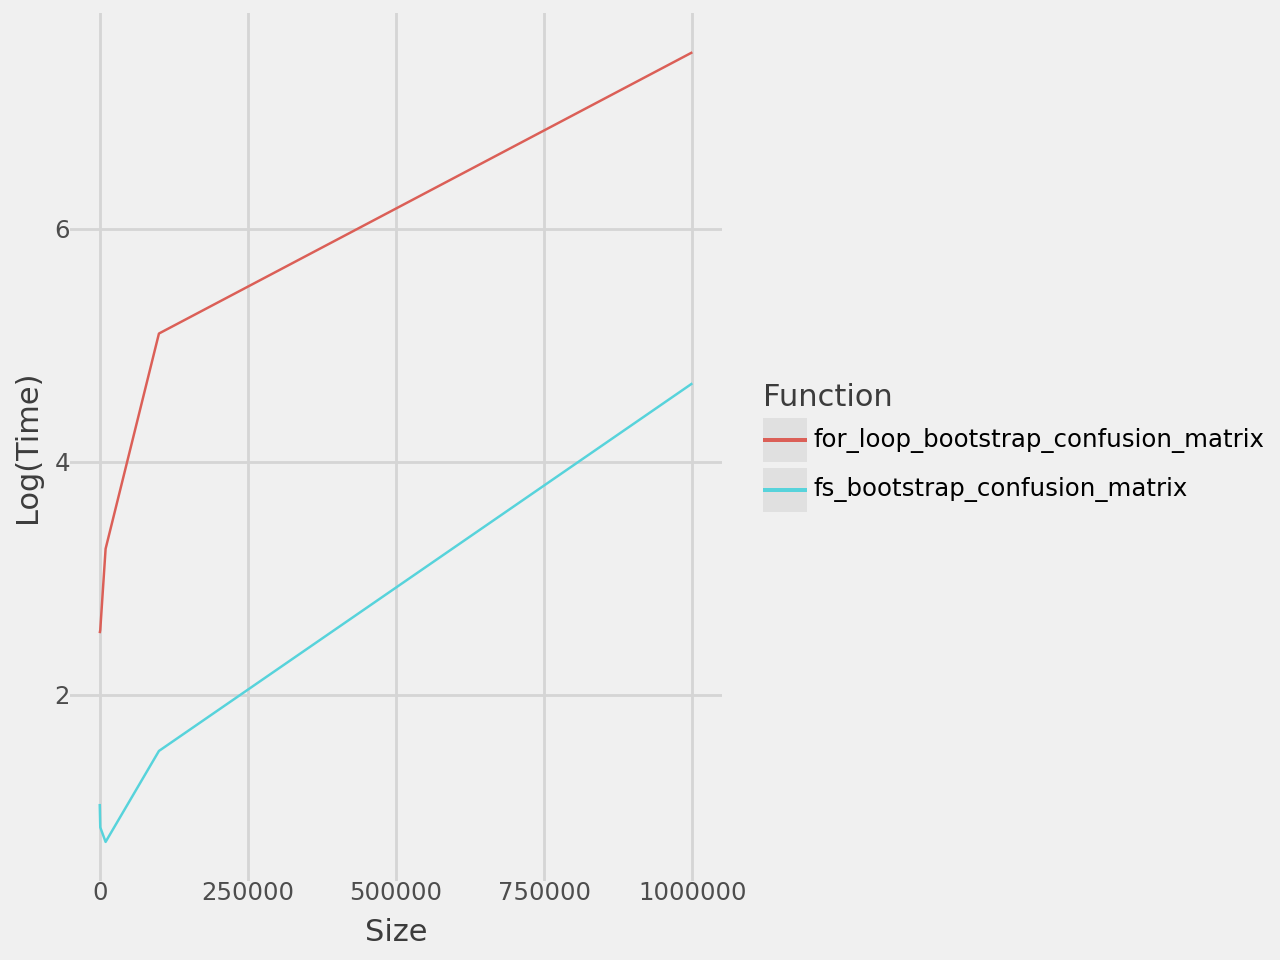

In [10]:
(
    p9.ggplot(
        BENCHMARK_DATA.filter(
            pl.col("Function").str.ends_with("_bootstrap_confusion_matrix")
        ),
        p9.aes(x="Size", y="Log(Time)", color="Function"),
    )
    + p9.geom_line()
    + p9.theme_538()
)

In [11]:
BENCHMARK_DATA

Function,Size,Time,Log(Time)
str,i64,f64,f64
"""fs_bootstrap_confusion_matrix""",100,1.894619,1.062854
"""for_loop_bootstrap_confusion_m…",100,11.535418,2.528558
"""fs_bootstrap_confusion_matrix""",1000,1.368693,0.862338
"""for_loop_bootstrap_confusion_m…",1000,11.882376,2.55586
"""fs_bootstrap_confusion_matrix""",10000,1.089827,0.737081
"""for_loop_bootstrap_confusion_m…",10000,24.85657,3.252565
"""fs_bootstrap_confusion_matrix""",100000,3.561819,1.517721
"""for_loop_bootstrap_confusion_m…",100000,162.982863,5.099762
"""fs_bootstrap_confusion_matrix""",1000000,105.96415,4.672494
